In [259]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
from tweepy import OAuthHandler
from timeit import default_timer as timer

## Gather

In [260]:
#Read CSV file , archive 
df_1= pd.read_csv('twitter-archive-enhanced.csv')

In [261]:
# Programmatically download the dog image prediction files from 
# the Udacity server using Request library
import os
import requests

# Save to a file
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [262]:
#open tsv file
images = pd.read_table('image_predictions/image-predictions.tsv',
                       sep='\t')

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [263]:
# Save only certain tweet elements in dataframe
elements_to_save = ['id', 'favorite_count', 'retweet_count']
# Later convert list to dataframe
data = []

with open('tweet_json.txt', 'r') as readfile: 
    # Read in JSON line and convert to dict
    tweet_json = readfile.readline()
    
    # Read line by line into DataFrame
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        # Create a smaller dict
        data_row = dict((k, tweet_dict[k]) for k in elements_to_save)
        data.append(data_row)
        
        # Read in JSON line and convert to dict
        tweet_json = readfile.readline()
        
            
    
df_tweet_info = pd.DataFrame.from_dict(data)

## Assess

### Visual Assessment 

In [264]:
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [265]:
images 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [266]:
df_tweet_info.head(5)

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


### Programatic Assessment

In [267]:
#On twitter archive file 
df_1.info

<bound method DataFrame.info of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689        

In [268]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [269]:
df_1.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
Daisy          7
Toby           7
an             7
Buddy          7
Bailey         7
Oscar          6
Stanley        6
Dave           6
Scout          6
Bella          6
Rusty          6
Koda           6
Leo            6
Milo           6
Jack           6
Jax            6
Phil           5
            ... 
Gordon         1
Divine         1
light          1
Petrick        1
Remy           1
Samsom         1
Shiloh         1
Fabio          1
Covach         1
Reagan         1
Jeb            1
Blanket        1
Cora           1
Harrison       1
Leonidas       1
Rodney         1
Bobble         1
Chadrick       1
Sparky         1
Godi           1
Shadoe         1
Eleanor        1
Bubba          1
Sojourner      1
Derby          1
Harvey         1
Bowie          1
Furzey        

In [270]:
#On image predictions 
images.info()
images.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [271]:
images.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
Shetland_sheepdog             18
teddy                         18
Maltese_dog                   18
beagle                        18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [272]:
images.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Pembroke                           27
collie                             27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
miniature_pinscher                 20
Samoyed                            20
malinois                           20
toy_terrier                        20
chow                               20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [273]:
images.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pekinese                          29
Pomeranian                        29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

In [274]:
df_tweet_info.info()
df_tweet_info.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


,favorite_count,id,retweet_count
count,2354.000000,2.354000e+03,2354.000000
mean,8080.968564,7.426978e+17,3164.797366
std,11814.771334,6.852812e+16,5284.770364
min,0.000000,6.660209e+17,0.000000
25%,1415.000000,6.783975e+17,624.500000
50%,3603.500000,7.194596e+17,1473.500000
75%,10122.250000,7.993058e+17,3652.000000
max,132810.000000,8.924206e+17,79515.000000


### Quality 

#### 1. (Twitter_archive) 343rd entry is an invalid entry filled with N/A's

#### 2. (Twitter_archive) Keep original ratings with images. Will need to remove retweets

#### 3. (Twitter_archive) Instances where Denominator is not equal to 10 and where Numerator is less than 10

#### 4. (Twitter_archive) Correct numerators and denominator as floats 

#### 5. (Twitter_archive )Convert Timestamp column to a datetime object

#### 6. (Twitter_archive) Convert ID fields from integers to objects 

#### 7. (Twitter_archive) Rename columns with more relevant names

#### 8. (Images) Drop 66 jpg_url duplicated

#### 9. (df_tweet_info) Rename the "id" column to "tweet_id" to match the other 2 dataset

### Tidiness 

#### 1. Make consistent the type of dog by creating a new column rather than having p1_dog, p2_dog, p3_dog

#### 2. All tables should be part of one dataset

#### 3. Place 'doggo', 'floofer', 'pupper', 'puppo' all under one column named "dog_stage"


## Clean

In [300]:
#As was recommended, make a copy of data that will be manipulated 
df_1_clean = df_1.copy()
images_clean = images.copy()
df_tweet_info_clean = df_tweet_info.copy()

#### Quality 

#### Define

(Twitter_archive) Remove 343th entry from dataframe

#### Code

In [301]:
# Drop 343rd entry 
df_1_clean = df_1_clean.drop(df_1_clean.index[342])

#### Test

In [302]:
# Check entries about point 
df_1_clean.iloc[340:343]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
341,832215726631055365,NaN,NaN,2017-02-16 13:11:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Moreton. He's the Good ...,7.932865e+17,4.196984e+09,2016-11-01 03:00:09 +0000,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,None,None,None,None
343,832040443403784192,NaN,NaN,2017-02-16 01:34:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Klein. These pics were ...,7.699404e+17,4.196984e+09,2016-08-28 16:51:16 +0000,https://twitter.com/dog_rates/status/769940425...,12,10,Klein,None,None,None,None


#### Define

(Twitter_archive) Keep original ratings with images. Will need to remove retweets. 

#### Code

In [303]:
#Delete retweets by filtering the NaN of retweeted_status_user_id
df_1_clean = df_1_clean[pd.isnull(df_1_clean['retweeted_status_user_id'])]

#### Test

In [304]:
print(sum(df_1_clean.retweeted_status_user_id.value_counts()))

0


#### Define

Fix issues with denominators and numerators 

#### Code

In [305]:
# a) Removing multiple cases of where the denominator of rating != 10.

# Code
df_1_clean.drop(df_1_clean[df_1_clean.rating_denominator != 10].index, inplace = True)

In [306]:
#b Cases where  numerator of rating < 10. Remove data
df_1_clean.drop(df_1_clean[df_1_clean.rating_numerator < 10].index, inplace = True)

#### Test

In [307]:
#a
df_1_clean.rating_denominator.value_counts()

10    1727
Name: rating_denominator, dtype: int64

In [308]:
#b
df_1_clean.rating_numerator.value_counts()

12      500
10      442
11      425
13      307
14       43
420       2
1776      1
666       1
182       1
75        1
27        1
26        1
17        1
15        1
Name: rating_numerator, dtype: int64

#### Define 

Correct numerators and denominator as floats
** Udacity reviewer stated that the most appropriate data type for the rating_numerator column should be float and denominator is preferred as float as well. 

#### Code

In [309]:
df_1_clean[['rating_numerator', 'rating_denominator']] = df_1_clean[['rating_numerator','rating_denominator']].astype(float)

#### Test

In [310]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1727 entries, 0 to 2350
Data columns (total 17 columns):
tweet_id                      1727 non-null int64
in_reply_to_status_id         62 non-null float64
in_reply_to_user_id           62 non-null float64
timestamp                     1727 non-null object
source                        1727 non-null object
text                          1727 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1682 non-null object
rating_numerator              1727 non-null float64
rating_denominator            1727 non-null float64
name                          1727 non-null object
doggo                         1727 non-null object
floofer                       1727 non-null object
pupper                        1727 non-null object
puppo                         1727 non-null object
dtypes: float64(6), int64(1), obje

#### Define

Timestamp column should be a datetime object

#### Code

In [311]:
df_1_clean['timestamp'] = pd.to_datetime(df_1_clean['timestamp'])

#### Test

In [312]:
type(df_1_clean['timestamp'].iloc[0])

pandas._libs.tslib.Timestamp

#### Define

The ID fields should be objects, not integers/floats because they are not numeric values and not intended for  calculations. Convert float variables (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id) to object.


#### Code

In [313]:
df_1_clean.in_reply_to_status_id = df_1_clean.in_reply_to_status_id.astype(str)
df_1_clean.in_reply_to_user_id = df_1_clean.in_reply_to_user_id.astype(str)
df_1_clean.retweeted_status_id = df_1_clean.retweeted_status_id.astype(str)
df_1_clean.retweeted_status_user_id = df_1_clean.retweeted_status_user_id.astype(str)
df_1_clean.tweet_id = df_1_clean.tweet_id.astype(str)

#### Test

In [314]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1727 entries, 0 to 2350
Data columns (total 17 columns):
tweet_id                      1727 non-null object
in_reply_to_status_id         1727 non-null object
in_reply_to_user_id           1727 non-null object
timestamp                     1727 non-null datetime64[ns]
source                        1727 non-null object
text                          1727 non-null object
retweeted_status_id           1727 non-null object
retweeted_status_user_id      1727 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 1682 non-null object
rating_numerator              1727 non-null float64
rating_denominator            1727 non-null float64
name                          1727 non-null object
doggo                         1727 non-null object
floofer                       1727 non-null object
pupper                        1727 non-null object
puppo                         1727 non-null object
dtypes: datetime64[

#### Define 

Rename columns with more relevant names.1. Convert the following: "timestamp" to "tweet_timestamp", "text" to "tweet_text", "rating_numerator" to "dog_rating_out_of_ten", "name" to "dog_name".

#### Code

In [315]:
new_names = {'timestamp': 'tweet_timestamp', 'text': 'tweet_text',
             'rating_numerator': 'dog_rating_out_of_ten'}

#### Test

In [316]:
df_1_clean.rename(columns=new_names, inplace=True)
df_1_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_timestamp,source,tweet_text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,dog_rating_out_of_ten,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None


#### Define

(Images) Drop 66 jpg_url duplicated.

#### Code

In [317]:
#CODE: Delete duplicated jpg_url
images_clean = images_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [318]:
sum(images_clean['jpg_url'].duplicated())

0

#### Define

Rename the "id" column to "tweet_id" to match the other 2 dataset

#### Code

In [319]:
df_tweet_info_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [320]:
df_tweet_info_clean.columns

Index(['favorite_count', 'tweet_id', 'retweet_count'], dtype='object')

In [321]:
df_tweet_info_clean.head(1)

,favorite_count,tweet_id,retweet_count
0,39467,892420643555336193,8853


#### Tidiness

#### Define

First true prediction (p1, p2 or p3) will be stored in dog_type

#### Code

In [322]:
dog_type = []
#create function to identify dog type from first 'true' prediction
def image(images_clean):
    if images_clean['p1_dog'] == True:
        dog_type.append(images_clean['p1'])
    elif images_clean['p2_dog'] == True:
        dog_type.append(images_clean['p2'])
    elif images_clean['p3_dog'] == True:
        dog_type.append(images_clean['p3'])
    else:
        dog_type.append('Error')
        
images_clean.apply(image, axis=1)
images_clean['dog_type'] = dog_type

#### Test

In [323]:
images_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone


#### Define

Create a new dataframe that merges all three dataframes 

#### Code

In [324]:
#check the data types 
type(df_1_clean['tweet_id'].iloc[0])

str

In [325]:
type(images_clean['tweet_id'].iloc[0])


numpy.int64

In [326]:
#Convert ids to match str value in order to merge all three.
images_clean.tweet_id = images_clean.tweet_id.astype(str)   

In [327]:
df_tweet_info_clean.tweet_id = df_tweet_info_clean.tweet_id.astype(str)

In [328]:
df_merge = pd.merge(df_1_clean, df_tweet_info_clean,on='tweet_id', how='inner')
df_merge = pd.merge(df_merge, images_clean,on='tweet_id', how='inner')

#### Test

In [329]:
df_merge.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_timestamp,source,tweet_text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,Error
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset


#### Define

Create new column for dog_stage instead of 'doggo', 'floofer', 'pupper', 'puppo'


#### Code

In [330]:
df_merge['dog_stage'] = 'None'

# Function that will be applied to each row (changes dog_stage value)
def get_dog_stage(row):
    # Keep all dog stages ()
    dog_stage = []
    
    # Record all times dog stage is given
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
    if row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    if row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    if row['puppo'] == 'puppo':
        dog_stage.append('puppo')
        
    if len(dog_stage) < 1: # Default to 'None' if list is empty
        row['dog_stage'] = 'None'
    else: 
        # Update the row and give back the final row
        row['dog_stage'] = ','.join(dog_stage)
    
    #Return updated column
    return row

# Apply to each row
df_merge = df_merge.apply(get_dog_stage, axis=1)

# Drop the redundant columns
df_merge = df_merge.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [331]:
df_merge.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'tweet_timestamp', 'source', 'tweet_text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'dog_rating_out_of_ten', 'rating_denominator', 'name',
       'favorite_count', 'retweet_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'dog_type', 'dog_stage'],
      dtype='object')

In [332]:
df_merge

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_timestamp,source,tweet_text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,Error,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,None
5,891087950875897856,nan,nan,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,nan,nan,NaN,https://twitter.com/dog_rates/status/891087950...,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,Chesapeake_Bay_retriever,None
6,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,Appenzeller,None
7,890729181411237888,nan,nan,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,nan,nan,NaN,https://twitter.com/dog_rates/status/890729181...,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,Pomeranian,None
8,890609185150312448,nan,nan,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,nan,nan,NaN,https://twitter.com/dog_rates/status/890609185...,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,Irish_terrier,None
9,890240255349198849,nan,nan,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,nan,nan,NaN,https://twitter.com/dog_rates/status/890240255...,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,Pembroke,doggo


In [333]:
#(Twitter_archive) Delete unnecessary columns for a cleaner dataset    
#get the column names
print(list(df_merge))

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'tweet_timestamp', 'source', 'tweet_text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'dog_rating_out_of_ten', 'rating_denominator', 'name', 'favorite_count', 'retweet_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type', 'dog_stage']


In [334]:
#CODE: Delete columns no needed
df_merge = df_merge.drop(['source','in_reply_to_status_id','in_reply_to_user_id',
'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls','img_num', 'p1', 'p1_conf','p1_dog','p2', 'p2_conf','p2_dog', 'p3', 
'p3_conf', 'p3_dog'], 1)

In [335]:
#TEST
list(df_1_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'tweet_timestamp',
 'source',
 'tweet_text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'dog_rating_out_of_ten',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

## Storing, Analyzing, and Visualizing Section  

#### Store Data into a master csv file 

In [336]:
df_merge.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

In [337]:
df_merge = pd.read_csv('twitter_archive_master.csv')
#test
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
tweet_id                 1500 non-null int64
tweet_timestamp          1500 non-null object
tweet_text               1500 non-null object
dog_rating_out_of_ten    1500 non-null float64
rating_denominator       1500 non-null float64
name                     1500 non-null object
favorite_count           1500 non-null int64
retweet_count            1500 non-null int64
jpg_url                  1500 non-null object
dog_type                 1500 non-null object
dog_stage                1500 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 129.0+ KB


In [338]:
df_merge

,tweet_id,tweet_timestamp,tweet_text,dog_rating_out_of_ten,rating_denominator,name,favorite_count,retweet_count,jpg_url,dog_type,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Error,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,None
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13.0,10.0,None,20562,3261,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,None
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,12041,2158,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,None
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13.0,10.0,None,56848,16716,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,None
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,28226,4429,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,None
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,32467,7711,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,doggo


#### Insight 1
Which is the least and most favored dog?
- The Brabancon_griffon is the least favorite. 
- The black-and-tan_coonhound is the most favorite.

In [339]:
dog_type_mean = df_merge.groupby('dog_type').mean()

In [340]:
dog_type_mean_sorted = dog_type_mean['favorite_count'].sort_values()
dog_type_mean_sorted

dog_type
Brabancon_griffon                885.000000
groenendael                     1156.500000
Irish_wolfhound                 1534.000000
standard_schnauzer              2046.000000
Scottish_deerhound              2333.500000
Tibetan_terrier                 2411.000000
basenji                         2663.625000
EntleBucher                     2678.000000
Maltese_dog                     2955.642857
Lhasa                           3283.750000
soft-coated_wheaten_terrier     3452.285714
Saint_Bernard                   3778.500000
bluetick                        3909.000000
Sussex_spaniel                  4061.500000
Dandie_Dinmont                  4077.800000
miniature_poodle                4133.000000
papillon                        4196.000000
Shih-Tzu                        4292.400000
toy_terrier                     4497.000000
redbone                         4759.000000
beagle                          5236.285714
miniature_schnauzer             5247.333333
Rhodesian_ridgeback    

#### Insight 2 
Which is the dog that is the outlier, with a 1776.0  

In [341]:
# The highest rated dog
df_merge['dog_rating_out_of_ten'].max()


1776.0

In [342]:
df_merge[df_merge['dog_rating_out_of_ten']== 1776.0 ]

,tweet_id,tweet_timestamp,tweet_text,dog_rating_out_of_ten,rating_denominator,name,favorite_count,retweet_count,jpg_url,dog_type,dog_stage
662,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,1776.0,10.0,Atticus,5569,2772,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,Error,None


#### Insight 3  
Which is the most common dog? The golden retriever 

In [343]:
df_merge['dog_type'].value_counts()

Error                             166
golden_retriever                  130
Labrador_retriever                 91
Pembroke                           88
Chihuahua                          65
pug                                44
toy_poodle                         43
chow                               42
Pomeranian                         40
Samoyed                            37
malamute                           29
Chesapeake_Bay_retriever           26
cocker_spaniel                     24
French_bulldog                     23
Eskimo_dog                         20
German_shepherd                    18
Siberian_husky                     18
Staffordshire_bullterrier          17
miniature_pinscher                 17
Cardigan                           16
Rottweiler                         16
kuvasz                             15
basset                             15
Shih-Tzu                           15
American_Staffordshire_terrier     14
beagle                             14
Maltese_dog 

#### Visualization 
Which is the most common category? 

In [344]:
df_merge.dog_stage.value_counts()

None             1249
pupper            160
doggo              56
puppo              20
floofer             7
doggo,pupper        6
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

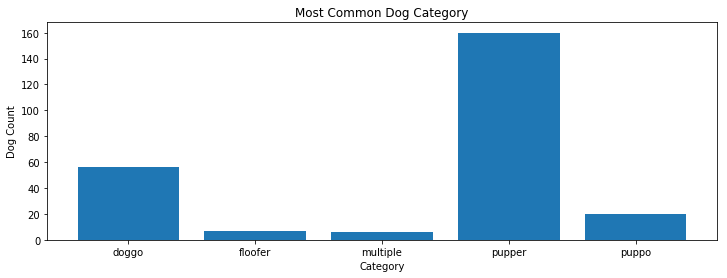

In [345]:
dog_type = ['pupper', 'doggo', 'puppo', 'floofer', 'multiple']
dog_counts = [160, 56, 20, 7, 6]

fig,ax = plt.subplots(figsize = (12,4))
ax.bar(dog_type, dog_counts, width = 0.8)
ax.set_ylabel('Dog Count')
ax.set_xlabel('Category')
plt.title("Most Common Dog Category")
plt.show()



## Sources 

https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/

https://aviaryan.com/blog/gsoc/downloading-files-from-urls

http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

https://stackoverflow.com/questions/40319743/plotting-a-bar-graph-in-python-with-matplotlib-pyplot

https://pythonspot.com/matplotlib-bar-chart/

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

https://stackoverflow.com/questions/38333954/converting-object-to-datetime-format-in-python/38334031